In [1]:
import praw
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import ipynb
from pmaw import PushshiftAPI
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from textblob import TextBlob
import statsmodels.api as sm
from statsmodels.api import OLS
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import scipy.stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Reddit API personal information

reddit = praw.Reddit(client_id = 'client_id', \
                     client_secret = 'client_secret', \
                     user_agent = 'stock market study', \
                     username = 'username', \
                     password ='password')

Version 7.2.0 of praw is outdated. Version 7.3.0 was released Thursday June 17, 2021.


In [3]:
# define function to get datetime data type from timestamp data type

def get_date(created):
    return dt.datetime.fromtimestamp(created)

In [4]:
# choose stock symbol, limit of no of reddit topics, and subreddit

symbol = 'GME'
limit = None
subreddit_target = 'wallstreetbets'

In [5]:
# define function to scrape Reddit

def scrape_reddit (limit, subreddit_target = '', symbol = ''):
    
    # set up reddit object from the target subreddit
    subreddit_scraped = reddit.subreddit(subreddit_target)
    # search the target subreddit with keyword and limit
    top_subreddit = subreddit_scraped.search(symbol, limit = limit)    
    
    # columns of data
    post_dict = {"title": [], 
                "score": [], 
                "id": [], 
                "comms_num": [], 
                "created": []}
    
    # use submission object to iterate each topic of subreddit to get different columns
    for submission in top_subreddit:
        post_dict["title"].append(submission.title)
        post_dict["score"].append(submission.score)
        post_dict["id"].append(submission.id)
        post_dict["comms_num"].append(submission.num_comments)
        post_dict["created"].append(submission.created)

    post_data = pd.DataFrame(post_dict)
    # change date to datetime data type from timestamp
    _timestamp = post_data["created"].apply(get_date)
    post_data = post_data.assign(timestamp = _timestamp)
    
    # set filter conditions
    post_data = post_data[post_data['timestamp'] > '2021-01-19']
    post_data = post_data[post_data['timestamp'] < '2021-05-29']
    post_data = post_data.drop("created", axis = 1)
    # discard time and keep date only
    post_data['timestamp'] = post_data['timestamp'].apply(dt.datetime.date)
    
    return post_data

In [8]:
# call function to scrape Reddit

reddit_data = scrape_reddit(limit, subreddit_target, symbol)
reddit_data = reddit_data.sort_values('timestamp').reset_index(drop = True)

In [169]:
# export to csv

reddit_data.to_csv('reddit_data.csv')

In [5]:
reddit_data = pd.read_csv('reddit_data.csv').drop('Unnamed: 0', axis = 1)

# change timestamp to datetime data type

reddit_data['timestamp'] = reddit_data['timestamp'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
reddit_data

,title,score,id,comms_num,timestamp
0,GME Megathread - Lemon Party 2: Electric Boogaloo,9081,l1xtan,50947,2021-01-21
1,GMREEEEEEEEEEEE Containment Thread - GME shitp...,14773,l2ljpt,92563,2021-01-22
2,GME YOLO update — Jan 22 2021,93066,l2x7he,6305,2021-01-23
3,"GME Thoughts, YOLOs, Gains, Stonk Updates, 🚀🚀🚀...",18420,l4lmrx,93097,2021-01-25
4,GME YOLO update — Jan 25 2021,83898,l4xje1,5451,2021-01-26
...,...,...,...,...,...
183,Investing in GME 2021 visualized,9682,nlfhqh,372,2021-05-26
184,For all of you retarded apes talking about the...,7306,nm53o9,1021,2021-05-27
185,Purchased $770k of GME,13134,nltsoo,1016,2021-05-27
186,Daym it feels good to be a GME hodler in times...,2411,nlmlev,203,2021-05-27


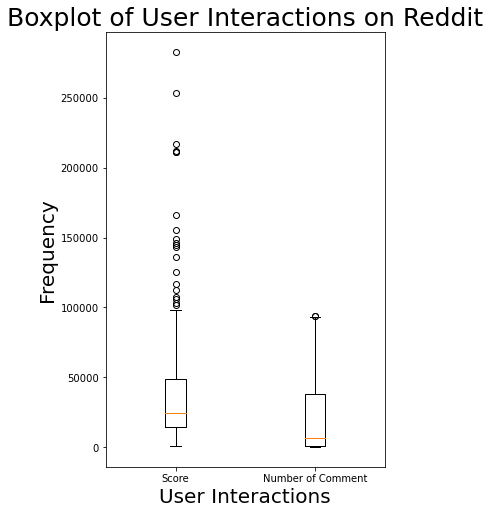

In [152]:
# plot the boxplot of user interactions on Reddit

labels = ['Score', 'Number of Comment']
fig, ax = plt.subplots(figsize = (5, 8))
plt.boxplot(reddit_data[['score', 'comms_num']])
plt.xlabel('User Interactions', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.title('Boxplot of User Interactions on Reddit', fontsize = 25)
ax.set_xticklabels(labels)
plt.show()

In [6]:
from ipynb.fs.defs.twitter_scraping import plot_data

start_time = reddit_data['timestamp'].min()
end_time = reddit_data['timestamp'].max()

# get stock data

symbol_data = plot_data(symbol, start_time)
symbol_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-20,37.369999,41.189999,36.060001,39.119999,33471800,0,0
2021-01-21,39.230000,44.750000,37.000000,43.029999,56216900,0,0
2021-01-22,42.590000,76.760002,42.320000,65.010002,197157900,0,0
2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000,0,0
2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000,0,0
...,...,...,...,...,...,...,...
2021-06-30,209.690002,215.279999,206.940002,214.139999,2539600,0,0
2021-07-01,213.399994,216.830002,202.000000,204.360001,2742100,0,0
2021-07-02,204.800003,205.449997,196.500000,202.830002,2599100,0,0


In [140]:
# get stock data for Average True Range calculations

symbol_data_atr = plot_data(symbol, '2020-12-13')

# define function of EMA

def wwma(values, n):
    return values.ewm(alpha = 1/n, min_periods = n, adjust = False).mean()

# define function of Average True Range

def atr(df, n = 14):
    data = df.copy()
    high = data['High']
    low = data['Low']
    close = data['Close']
    data['tr0'] = abs(high - low)
    data['tr1'] = abs(high - close.shift())
    data['tr2'] = abs(low - close.shift())
    tr = data[['tr0', 'tr1', 'tr2']].max(axis=1)
    atr = wwma(tr, n)
    
    return atr

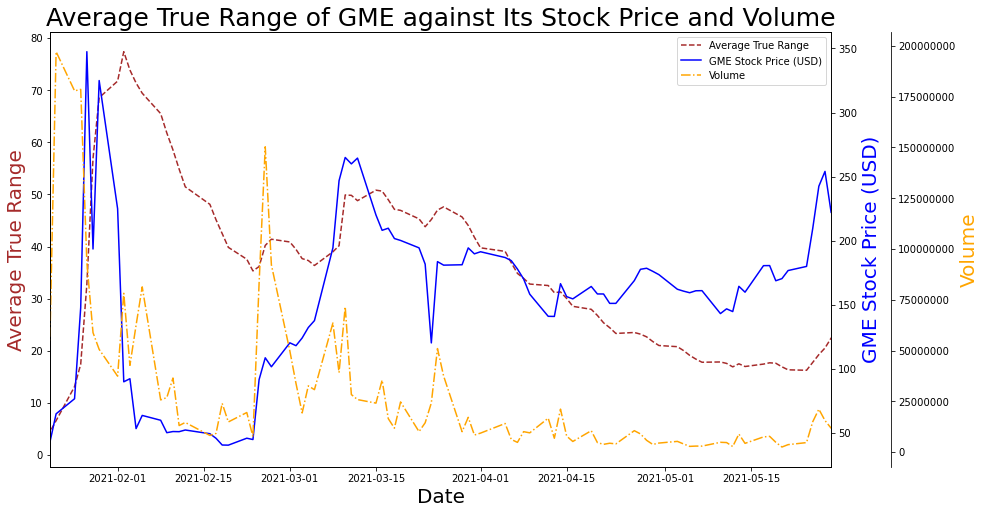

In [168]:
# plot Average True Range of GME

plot_title = 'Average True Range of ' + symbol + ' against Its Stock Price and Volume'
stock_label = symbol + ' Stock Price (USD)'

# more versatile wrapper
fig, host = plt.subplots(figsize = (14, 8)) 

host.set_title(plot_title, fontsize = 25)

# additional axis
par1 = host.twinx()
par2 = host.twinx()

# set x limit
host.set_xlim(start_time, end_time)
# don't display scientic notation
plt.ticklabel_format(style = 'plain', useOffset = False, axis = 'y')

host.set_xlabel("Date", fontsize = 20)
host.set_ylabel("Average True Range", fontsize = 20)
par1.set_ylabel(stock_label, fontsize = 20)
par2.set_ylabel("Volume", fontsize = 20)

p1, = host.plot(atr(symbol_data_atr), '--', color = 'brown', label = "Average True Range")
p2, = par1.plot(symbol_data['Close'], color = 'blue', label = stock_label)
p3, = par2.plot(symbol_data['Volume'], '-.', color = 'orange', label = "Volume")

lns = [p1, p2, p3]
# display legend and set its location
host.legend(handles = lns, loc = 'best')

# set the position of additional axis
par2.spines['right'].set_position(('outward', 60))

# set the colour of axis label
host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

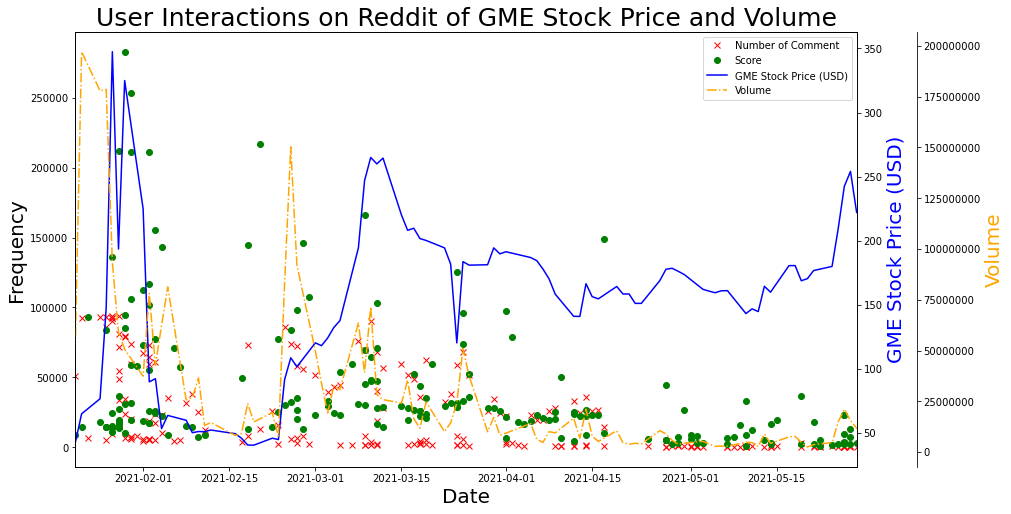

In [24]:
# plot user interactions on Reddit of GME stock price and volume

plot_title = 'User Interactions on Reddit of ' + symbol + ' Stock Price and Volume'
stock_label = symbol + ' Stock Price (USD)'

# more versatile wrapper
fig, host = plt.subplots(figsize = (14, 8)) 

host.set_title(plot_title, fontsize = 25)

# additional axis
par1 = host.twinx()
par2 = host.twinx()
    
# set x limit
host.set_xlim(start_time, end_time)
# don't display scientic notation
plt.ticklabel_format(style = 'plain', useOffset = False, axis = 'y')
    
host.set_xlabel("Date", fontsize = 20)
host.set_ylabel("Frequency", fontsize = 20)
par1.set_ylabel(stock_label, fontsize = 20)
par2.set_ylabel("Volume", fontsize = 20)

p1, = host.plot(reddit_data['timestamp'], reddit_data['comms_num'], 'x', color = 'red', label = "Number of Comment")
p2, = host.plot(reddit_data['timestamp'], reddit_data['score'], 'o', color = 'green', label = "Score")
p3, = par1.plot(symbol_data['Close'], color = 'blue', label = stock_label)
p4, = par2.plot(symbol_data['Volume'], '-.', color = 'orange', label = "Volume")

lns = [p1, p2, p3, p4]
# display legend and set its location
host.legend(handles = lns, loc = 'best')

# set the position of additional axis
par2.spines['right'].set_position(('outward', 60))

# set the colour of axis label
par1.yaxis.label.set_color(p3.get_color())
par2.yaxis.label.set_color(p4.get_color())

In [29]:
# get comment-related columns

reddit_comment = reddit_data[['id', 'comms_num','timestamp']]
reddit_comment

,id,comms_num,timestamp
0,l1xtan,50947,2021-01-21
1,l2ljpt,92566,2021-01-22
2,l2x7he,6305,2021-01-23
3,l4lmrx,93097,2021-01-25
4,l5c0nr,93081,2021-01-26
...,...,...,...
183,nkrbt7,3186,2021-05-26
184,nltsoo,1016,2021-05-27
185,nlmlev,203,2021-05-27
186,nm53o9,1021,2021-05-27


In [13]:
api = PushshiftAPI()

# define function to get each comment id

def get_comment_id(ids):

    comment_id_list = []
    comment_ids = api.search_submission_comment_ids(ids = ids)
    comment_id_list = [c_id for c_id in comment_ids]
        
    return comment_id_list

In [30]:
%%time

# call function to get comment id

reddit_comment['comment_id'] = reddit_comment.loc[:, 'id'].apply(get_comment_id)
reddit_comment

Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 50.00% - Requests: 2 - Batches: 2 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 50.00% - Requests: 2 - Batches: 2 - Items R

Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items

<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,id,comms_num,timestamp,comment_id
0,l1xtan,50947,2021-01-21,"[gk20rf4, gk20rhe, gk20rr6, gk20sdg, gk20t4y, ..."
1,l2ljpt,92566,2021-01-22,"[gk5y46l, gk5y49l, gk5y4j9, gk5y4sx, gk5y4ts, ..."
2,l2x7he,6305,2021-01-23,"[gk8no8d, gk8nrgz, gk8nrlw, gk8nrnh, gk8nrt2, ..."
3,l4lmrx,93097,2021-01-25,"[gkycihh, gkycn4p, gkycp8r, gkyd96k, gkydcyx, ..."
4,l5c0nr,93081,2021-01-26,"[gkycqwj, gkyd3bf, gkydp7v, gkydu3m, gkydxcl, ..."
...,...,...,...,...
183,nkrbt7,3186,2021-05-26,"[gzea7oj, gzeae67, gzeahd7, gzeajdp, gzeaoes, ..."
184,nltsoo,1016,2021-05-27,"[gzkmoe0, gzkmq1c, gzkmr44, gzkmu8u, gzkmxnb, ..."
185,nlmlev,203,2021-05-27,"[gzjdwju, gzje2t2, gzje5va, gzjfyyk, gzjg3zd, ..."
186,nm53o9,1021,2021-05-27,"[gzmgnih, gzmgq3f, gzmgqlr, gzmgve6, gzmh71b, ..."


In [100]:
# limit to 1000 comment id for each post

for i in range(len(reddit_comment)):
    reddit_comment['comment_id'][i] = reddit_comment.loc[i, 'comment_id'][:1000]
    
reddit_comment

<ipython-input-100-39200dada083>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reddit_comment['comment_id'][i] = reddit_comment.loc[i, 'comment_id'][:1000]
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,comms_num,timestamp,comment_id
0,l1xtan,50947,2021-01-21,"[gk20rf4, gk20rhe, gk20rr6, gk20sdg, gk20t4y, ..."
1,l2ljpt,92566,2021-01-22,"[gk5y46l, gk5y49l, gk5y4j9, gk5y4sx, gk5y4ts, ..."
2,l2x7he,6305,2021-01-23,"[gk8no8d, gk8nrgz, gk8nrlw, gk8nrnh, gk8nrt2, ..."
3,l4lmrx,93097,2021-01-25,"[gkycihh, gkycn4p, gkycp8r, gkyd96k, gkydcyx, ..."
4,l5c0nr,93081,2021-01-26,"[gkycqwj, gkyd3bf, gkydp7v, gkydu3m, gkydxcl, ..."
...,...,...,...,...
183,nkrbt7,3186,2021-05-26,"[gzea7oj, gzeae67, gzeahd7, gzeajdp, gzeaoes, ..."
184,nltsoo,1016,2021-05-27,"[gzkmoe0, gzkmq1c, gzkmr44, gzkmu8u, gzkmxnb, ..."
185,nlmlev,203,2021-05-27,"[gzjdwju, gzje2t2, gzje5va, gzjfyyk, gzjg3zd, ..."
186,nm53o9,1021,2021-05-27,"[gzmgnih, gzmgq3f, gzmgqlr, gzmgve6, gzmh71b, ..."


In [116]:
# define function to get comment

def get_comment(comment_id):
    
    comment_list = []
    comments = api.search_comments(ids = comment_id)
    comment_list = [comment for comment in comments]
    comment_joined = ' '.join([item['body'] for item in comment_list])
    
    return comment_joined

In [123]:
%%time

# call function to get comments

reddit_comment['comment_body'] = reddit_comment['comment_id'].apply(get_comment)
reddit_comment

Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 50.00% - Requests: 2 - Batches: 2 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items 

Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items

,id,comms_num,timestamp,comment_id,comment_body
0,l1xtan,50947,2021-01-21,"[gk20rf4, gk20rhe, gk20rr6, gk20sdg, gk20t4y, ...",💎🙌🏼 in 🇩🇪 F**ck Andrew Left and Citron for the...
1,l2ljpt,92566,2021-01-22,"[gk5y46l, gk5y49l, gk5y4j9, gk5y4sx, gk5y4ts, ...",50 EOD or bust. [deleted] To the Moooon!! 🚀 Wo...
2,l2x7he,6305,2021-01-23,"[gk8no8d, gk8nrgz, gk8nrlw, gk8nrnh, gk8nrt2, ...",This post was flaired as a YOLO so it's on the...
3,l4lmrx,93097,2021-01-25,"[gkycihh, gkycn4p, gkycp8r, gkyd96k, gkydcyx, ...",[removed] [removed] [removed] [removed] [remov...
4,l5c0nr,93081,2021-01-26,"[gkycqwj, gkyd3bf, gkydp7v, gkydu3m, gkydxcl, ...",I put an order in via Revolut last night at 19...
...,...,...,...,...,...
183,nkrbt7,3186,2021-05-26,"[gzea7oj, gzeae67, gzeahd7, gzeajdp, gzeaoes, ...",I love the stock. $300 is merely starting the...
184,nltsoo,1016,2021-05-27,"[gzkmoe0, gzkmq1c, gzkmr44, gzkmu8u, gzkmxnb, ...","🦍 Here, take my wife! Always that one that buy..."
185,nlmlev,203,2021-05-27,"[gzjdwju, gzje2t2, gzje5va, gzjfyyk, gzjg3zd, ...",[removed] Up and at them! Because that’s what ...
186,nm53o9,1021,2021-05-27,"[gzmgnih, gzmgq3f, gzmgqlr, gzmgve6, gzmh71b, ...",[removed] My jaque is to the tits. It’s not on...


In [136]:
# group comments with the same date together
reddit_comment = reddit_comment.drop(['id', 'comms_num', 'comment_id'], axis = 1) \
                .groupby(by = 'timestamp')['comment_body'].apply(' '.join).reset_index()
reddit_comment

,timestamp,comment_body
0,2021-01-21,💎🙌🏼 in 🇩🇪 F**ck Andrew Left and Citron for the...
1,2021-01-22,50 EOD or bust. [deleted] To the Moooon!! 🚀 Wo...
2,2021-01-23,This post was flaired as a YOLO so it's on the...
3,2021-01-25,[removed] [removed] [removed] [removed] [remov...
4,2021-01-26,I put an order in via Revolut last night at 19...
...,...,...
90,2021-05-24,"Yes, I am still holding my shares. Yes, I inte..."
91,2021-05-25,!diamondhandsbot GME 5/28 $185 C [GME 2021-05-...
92,2021-05-26,GME stop is running guys let’s go My Pener jus...
93,2021-05-27,"🦍 Here, take my wife! Always that one that buy..."


In [137]:
# export to csv
reddit_comment.to_csv('reddit_comment.csv')

In [141]:
%%time
%store -r stop_list
%store -r nlp

from ipynb.fs.defs.twitter_scraping import preprocess

# clean comments

reddit_comment['processed_comment'] = reddit_comment['comment_body'].apply(lambda x: preprocess(x, stop_list, nlp))
reddit_comment

CPU times: user 48min 46s, sys: 4min 51s, total: 53min 37s
Wall time: 59min 7s


,timestamp,comment_body,processed_comment
0,2021-01-21,💎🙌🏼 in 🇩🇪 F**ck Andrew Left and Citron for the...,for ck andrew leave citron market manipulation...
1,2021-01-22,50 EOD or bust. [deleted] To the Moooon!! 🚀 Wo...,eod bust delete moooon wow believe early gme m...
2,2021-01-23,This post was flaired as a YOLO so it's on the...,post flaired yolo yolo list find yolos hey u d...
3,2021-01-25,[removed] [removed] [removed] [removed] [remov...,remove remove remove remove remove remove remo...
4,2021-01-26,I put an order in via Revolut last night at 19...,put order via revolut last night still list pe...
...,...,...,...
90,2021-05-24,"Yes, I am still holding my shares. Yes, I inte...",yes still hold share yes intend dump profit sh...
91,2021-05-25,!diamondhandsbot GME 5/28 $185 C [GME 2021-05-...,diamondhandsbot gme c gme c comon k someday ri...
92,2021-05-26,GME stop is running guys let’s go My Pener jus...,gme stop run guy let go pener rise clip solan ...
93,2021-05-27,"🦍 Here, take my wife! Always that one that buy...",take wife always one busy shitload explodes me...


In [186]:
%%time

# calculate sentiment of each processed comment

reddit_comment['sentiment'] = reddit_comment['processed_comment'].apply(lambda x: TextBlob(x).sentiment[0])
# change index to datetime data type
reddit_comment = reddit_comment.set_index('timestamp')
reddit_comment

CPU times: user 5.69 s, sys: 70 ms, total: 5.76 s
Wall time: 5.94 s


,comment_body,processed_comment,sentiment
timestamp,,,
2021-01-21,💎🙌🏼 in 🇩🇪 F**ck Andrew Left and Citron for the...,for ck andrew leave citron market manipulation...,0.040960
2021-01-22,50 EOD or bust. [deleted] To the Moooon!! 🚀 Wo...,eod bust delete moooon wow believe early gme m...,0.036500
2021-01-23,This post was flaired as a YOLO so it's on the...,post flaired yolo yolo list find yolos hey u d...,0.041117
2021-01-25,[removed] [removed] [removed] [removed] [remov...,remove remove remove remove remove remove remo...,0.068679
2021-01-26,I put an order in via Revolut last night at 19...,put order via revolut last night still list pe...,0.064843
...,...,...,...
2021-05-24,"Yes, I am still holding my shares. Yes, I inte...",yes still hold share yes intend dump profit sh...,0.073722
2021-05-25,!diamondhandsbot GME 5/28 $185 C [GME 2021-05-...,diamondhandsbot gme c gme c comon k someday ri...,0.055101
2021-05-26,GME stop is running guys let’s go My Pener jus...,gme stop run guy let go pener rise clip solan ...,0.094620


In [188]:
# export to csv

reddit_comment.to_csv('processed_comment.csv')

In [9]:
reddit_comment = pd.read_csv('processed_comment.csv')
# change timestamp to datetime data type
reddit_comment['timestamp'] = reddit_comment['timestamp'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
reddit_comment

,timestamp,comment_body,processed_comment,sentiment
0,2021-01-21,💎🙌🏼 in 🇩🇪 F**ck Andrew Left and Citron for the...,for ck andrew leave citron market manipulation...,0.040960
1,2021-01-22,50 EOD or bust. [deleted] To the Moooon!! 🚀 Wo...,eod bust delete moooon wow believe early gme m...,0.036500
2,2021-01-23,This post was flaired as a YOLO so it's on the...,post flaired yolo yolo list find yolos hey u d...,0.041117
3,2021-01-25,[removed] [removed] [removed] [removed] [remov...,remove remove remove remove remove remove remo...,0.068679
4,2021-01-26,I put an order in via Revolut last night at 19...,put order via revolut last night still list pe...,0.064843
...,...,...,...,...
90,2021-05-24,"Yes, I am still holding my shares. Yes, I inte...",yes still hold share yes intend dump profit sh...,0.073722
91,2021-05-25,!diamondhandsbot GME 5/28 $185 C [GME 2021-05-...,diamondhandsbot gme c gme c comon k someday ri...,0.055101
92,2021-05-26,GME stop is running guys let’s go My Pener jus...,gme stop run guy let go pener rise clip solan ...,0.094620
93,2021-05-27,"🦍 Here, take my wife! Always that one that buy...",take wife always one busy shitload explodes me...,0.072619


In [146]:
# join all processed comments into 1 text body

all_comments = ' '.join([text for text in reddit_comment['processed_comment']])
all_comments[:500]

'for ck andrew leave citron market manipulation hi go fuckin sell bitches today battle bastards hopefully end badly series remove let goooo mod keep remove retarded gme meme enjoy autism go reload post call dip yeah good gme tdm tight camel snatch sandstorm wait squeeze x b everybody buy stream start suppose start anyway everybody hold dip dip buy time beeg money morning soldier glad see back front line choo choo train tendeee town delete welcome be new visitor may aware awesome deal benefit game'

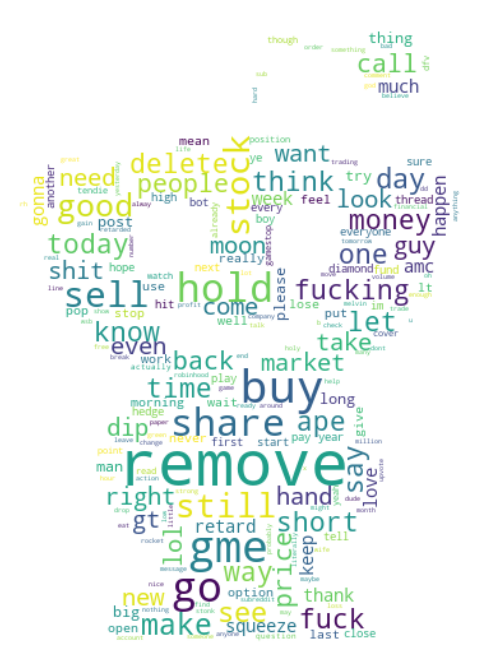

In [148]:
# plot word cloud of Reddit comments

# create a mask for the word cloud
mask = np.array(Image.open('reddit_logo.png'))
wordcloud = WordCloud(width = 1000, height = 1000, background_color = 'white', collocations = False, \
                       mask = mask).generate(all_comments)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

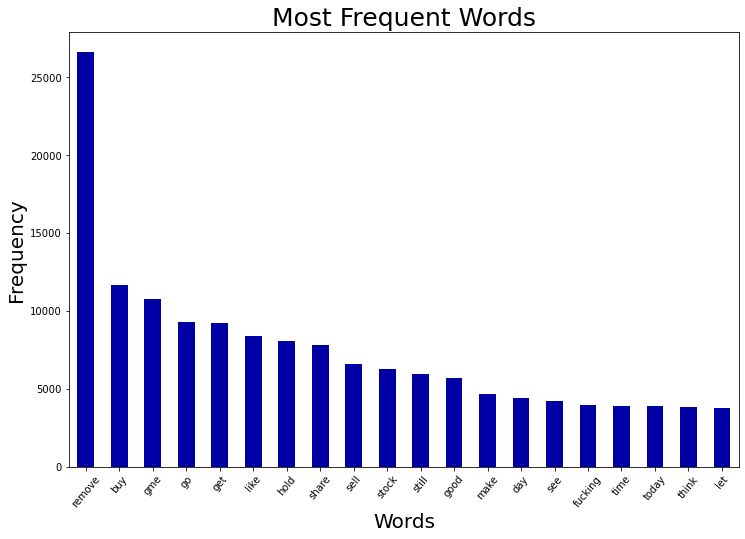

In [155]:
# plot most frequent words

freq = pd.Series(all_comments.split()).value_counts()[:20]
plt.figure(figsize = (12, 8))
freq.plot.bar(color = '#0000A5')
plt.xticks(rotation = 50)
plt.xlabel('Words', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.title('Most Frequent Words', fontsize = 25)
plt.show()

In [156]:
# overall tweet sentiment

overall_sentiment = TextBlob(all_comments).sentiment[0]
print("The overall sentiment of all tweets is: " + str(overall_sentiment), "1: positive", "-1: negative", sep = "\n")

The overall sentiment of all tweets is: 0.06265244252813057
1: positive
-1: negative


In [7]:
# get implied volatility data

iv = pd.read_csv('gme_iv.csv')
# set date to datetime data type
iv['date'] = iv['date'].apply(lambda x: dt.datetime.strptime(x, '%d-%m-%Y'))
iv = iv.set_index('date')
iv

,iv30
date,
2021-01-21,171.3
2021-01-22,249.0
2021-01-25,346.3
2021-01-26,385.4
2021-01-27,400.0
...,...
2021-05-24,121.4
2021-05-25,150.0
2021-05-26,166.2


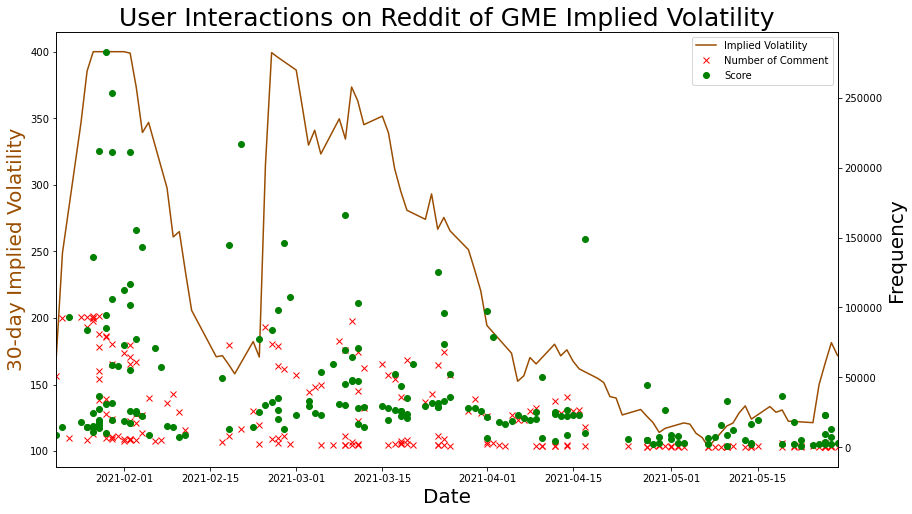

In [14]:
# plot user interactions on Reddit of GME implied volatility

plot_title = 'User Interactions on Reddit of ' + symbol + ' Implied Volatility'

# more versatile wrapper
fig, host = plt.subplots(figsize = (14, 8)) 
host.set_title(plot_title, fontsize = 25)

# additional axis
par1 = host.twinx()
    
# set x limit
host.set_xlim(start_time, end_time)
    
host.set_xlabel("Date", fontsize = 20)
host.set_ylabel("30-day Implied Volatility", fontsize = 20)
par1.set_ylabel("Frequency", fontsize = 20)

p1, = host.plot(iv, color = '#994d00', label = "Implied Volatility")
p2, = par1.plot(reddit_data['timestamp'], reddit_data['comms_num'], 'x', color = 'red', label = "Number of Comment")
p3, = par1.plot(reddit_data['timestamp'], reddit_data['score'], 'o', color = 'green', label = "Score")

lns = [p1, p2, p3]
# display legend and set its location
host.legend(handles = lns, loc = 'best')

# set colour of additional axis
host.yaxis.label.set_color(p1.get_color())

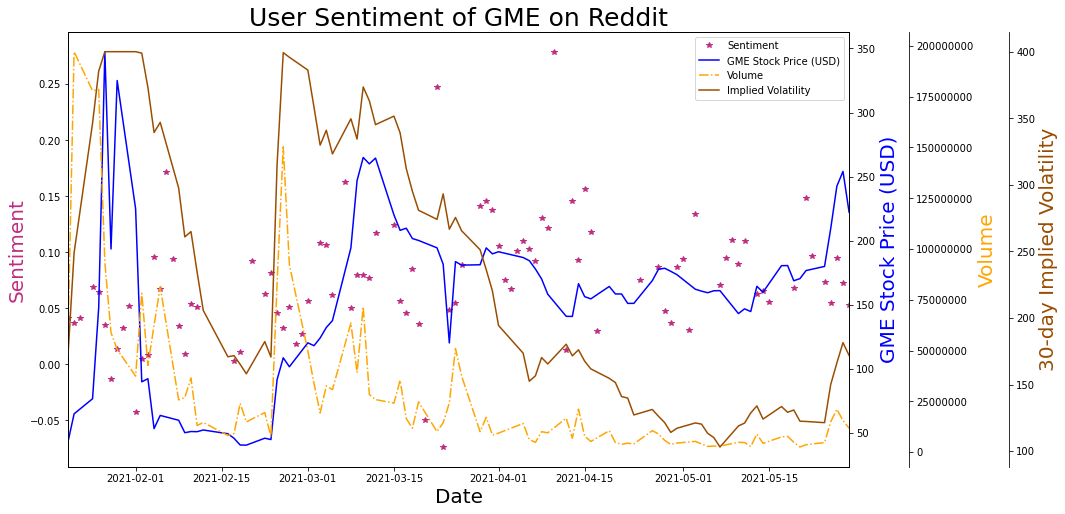

In [11]:
# plot user sentiment of GME on Reddit

plot_title = 'User Sentiment of ' + symbol + ' on Reddit'
stock_label = symbol + ' Stock Price (USD)'

# more versatile wrapper
fig, host = plt.subplots(figsize = (14, 8)) 
host.set_title(plot_title, fontsize = 25)

# additional axis
par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()

# set x limit
host.set_xlim(start_time, end_time)
#host.set_ylim(-0.0725, 0.3)
# don't display scientific notation
par2.ticklabel_format(style = 'plain', useOffset = False, axis = 'y')
    
host.set_xlabel("Date", fontsize = 20)
host.set_ylabel("Sentiment", fontsize = 20)
par1.set_ylabel(stock_label, fontsize = 20)
par2.set_ylabel("Volume", fontsize = 20)
par3.set_ylabel("30-day Implied Volatility", fontsize = 20)

p1, = host.plot(reddit_comment['timestamp'], reddit_comment['sentiment'], '*', color = '#bf2d80', label = "Sentiment")
p2, = par1.plot(symbol_data['Close'], color = 'blue', label = stock_label)
p3, = par2.plot(symbol_data['Volume'], '-.', color = 'orange', label = "Volume")
p4, = par3.plot(iv, color = '#994d00', label = "Implied Volatility")

lns = [p1, p2, p3, p4]
# display legend and set its location
host.legend(handles = lns, loc = 1)

# set position of additional axis
par2.spines['right'].set_position(('outward', 60))
par3.spines['right'].set_position(('outward', 160))

# set colour of additional axis
host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())

# set axis to log scale
#host.set_yscale('log')
#par2.set_yscale('log')
#par3.set_yscale('log')

In [10]:
# combine data for modelling

# set index to timestamp
reddit_comment = reddit_comment.set_index('timestamp')
# combine stock and iv data
model_data = symbol_data.merge(iv, left_index = True, right_index = True)
# combine with reddit comment data
model_data = model_data.merge(reddit_comment, left_index = True, right_index = True)\
             .drop(['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'comment_body', 'processed_comment'], axis = 1)
temp = reddit_data.drop(['title', 'id'], axis = 1).groupby(by = 'timestamp').sum()
# combine with reddit data
model_data = model_data.merge(temp, left_index = True, right_index = True)
# set index to datetime frequency to "day"
model_data.index = pd.DatetimeIndex(model_data.index).to_period('D')
# apply log calculation to each cell and drop nan values
model_data_log = np.log(model_data).dropna()
model_data_log

,Close,Volume,iv30,sentiment,score,comms_num
2021-01-21,3.761898,17.844728,5.143416,-3.195162,9.113940,10.838541
2021-01-22,4.174541,19.099515,5.517453,-3.310453,9.600556,11.435645
2021-01-25,4.341074,18.996586,5.847305,-2.678315,9.821192,11.441397
2021-01-26,4.997077,19.000592,5.954282,-2.735784,11.631695,12.125258
2021-01-27,5.850793,18.352367,5.991465,-3.357723,12.210951,12.845542
...,...,...,...,...,...,...
2021-05-24,5.193012,15.355448,4.799091,-2.607455,7.535830,6.447306
2021-05-25,5.344390,16.516032,5.010635,-2.898588,7.696667,5.384495
2021-05-26,5.491249,16.865726,5.113192,-2.357888,11.036389,8.440312
2021-05-27,5.537846,16.558046,5.201256,-2.622535,10.036750,7.714231


In [25]:
# descriptive statistics

names = ['Log(Price)', 'Log(Volume)', 'Log(IV)', 'Log(Sentiment)', 'Log(Score)', 'Log(ComNum)']
model_data_log.columns = names
dt = model_data_log.describe().transpose()
dt.columns = ['N', 'Mean', 'SD', 'Min', '1st Quartile', '2nd Quartile', '3rd Quartile', 'Max']
dt = dt.apply(lambda x: round(x, 3))
dt['N'] = dt['N'].apply(int)
dt

,N,Mean,SD,Min,1st Quartile,2nd Quartile,3rd Quartile,Max
Log(Price),70,4.932,0.540,3.706,4.714,5.109,5.266,5.851
Log(Volume),70,16.755,1.079,14.892,15.957,16.714,17.471,19.100
Log(IV),70,5.403,0.420,4.636,5.108,5.461,5.823,5.991
Log(Sentiment),70,-2.802,0.824,-5.795,-3.023,-2.664,-2.256,-1.396
Log(Score),70,10.476,1.293,7.536,9.823,10.286,11.363,13.212
Log(ComNum),70,9.867,1.835,5.384,8.758,10.396,11.168,12.846


In [36]:
# export to csv

dt.to_csv('dt_reddit.csv')

In [26]:
# Pearson correlation matrix

cor_dt = model_data_log.corr().apply(lambda x: round(x, 3))
cor_dt

,Log(Price),Log(Volume),Log(IV),Log(Sentiment),Log(Score),Log(ComNum)
Log(Price),1.000,-0.228,-0.035,0.410,0.109,-0.121
Log(Volume),-0.228,1.000,0.834,-0.330,0.431,0.728
Log(IV),-0.035,0.834,1.000,-0.215,0.572,0.828
Log(Sentiment),0.410,-0.330,-0.215,1.000,-0.268,-0.198
Log(Score),0.109,0.431,0.572,-0.268,1.000,0.703
Log(ComNum),-0.121,0.728,0.828,-0.198,0.703,1.000


In [39]:
# export to csv

cor_dt.to_csv('cor_dt_reddit.csv')

In [28]:
# calculate p-values of Pearson correlation

cor_test = model_data_log.copy()
target = 'Log(Price)'
col = cor_test.loc[:, target]
cor_test = cor_test.drop(target, axis = 1)
display(col)
display(cor_test)
n = cor_test.columns

for i in range(len(n)):
    print(scipy.stats.pearsonr(col, cor_test[n[i]]))

2021-01-21    3.761898
2021-01-22    4.174541
2021-01-25    4.341074
2021-01-26    4.997077
2021-01-27    5.850793
                ...   
2021-05-24    5.193012
2021-05-25    5.344390
2021-05-26    5.491249
2021-05-27    5.537846
2021-05-28    5.402677
Freq: D, Name: Log(Price), Length: 70, dtype: float64

,Log(Volume),Log(IV),Log(Sentiment),Log(Score),Log(ComNum)
2021-01-21,17.844728,5.143416,-3.195162,9.113940,10.838541
2021-01-22,19.099515,5.517453,-3.310453,9.600556,11.435645
2021-01-25,18.996586,5.847305,-2.678315,9.821192,11.441397
2021-01-26,19.000592,5.954282,-2.735784,11.631695,12.125258
2021-01-27,18.352367,5.991465,-3.357723,12.210951,12.845542
...,...,...,...,...,...
2021-05-24,15.355448,4.799091,-2.607455,7.535830,6.447306
2021-05-25,16.516032,5.010635,-2.898588,7.696667,5.384495
2021-05-26,16.865726,5.113192,-2.357888,11.036389,8.440312
2021-05-27,16.558046,5.201256,-2.622535,10.036750,7.714231


(-0.22830527659772198, 0.05731063564739582)
(-0.035336574174325106, 0.771499253992172)
(0.41048867630675573, 0.00041638238369594185)
(0.10891153229761658, 0.36945974119795016)
(-0.12060537579806734, 0.3199676761487463)


In [58]:
# 1-way Anova

stats.f_oneway(model_data_log['Log(Sentiment)'], model_data_log['Log(Score)'], model_data_log['Log(ComNum)'])

F_onewayResult(statistic=2064.161074393147, pvalue=1.8673188903665963e-137)

In [30]:
# OLS regression model of stock price

X = model_data_log.drop(['Log(Price)', 'Log(Volume)', 'Log(IV)'], axis = 1)
X = sm.add_constant(X)
y = model_data_log.loc[:, 'Log(Price)']

model_1 = sm.OLS(y, X).fit(cov_type = 'HAC', cov_kwds = {'maxlags':1})
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Log(Price)   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     7.336
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           0.000257
Time:                        23:11:33   Log-Likelihood:                -43.525
No. Observations:                  70   AIC:                             95.05
Df Residuals:                      66   BIC:                             104.0
Df Model:                           3                                         
Covariance Type:                  HAC                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.7005      0.567      8.292      0.000       3.589       5.812
Log(Sentiment)     0.3076      0.077      4.015      0.000       0.157       0.458
Log(Score)         0.2101      0.070      2.992      0.003       0.072       0.348
Log(ComNum)       -0.1123      0.039     -2.849      0.004      -0.190      -0.035
==============================================================================
Omnibus:                        9.923   Durbin-Watson:                   0.850
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.288
Skew:                          -0.654   Prob(JB):                      0.00354
Kurtosis:                       4.470   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

In [31]:
# OLS regression model of volume

y = model_data_log.loc[:, 'Log(Volume)']

model_2 = sm.OLS(y, X).fit(cov_type = 'HAC', cov_kwds = {'maxlags':1})
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Log(Volume)   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     28.18
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           7.56e-12
Time:                        23:11:45   Log-Likelihood:                -72.936
No. Observations:                  70   AIC:                             153.9
Df Residuals:                      66   BIC:                             162.9
Df Model:                           3                                         
Covariance Type:                  HAC                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.9888      0.636     20.435      0.000      11.743      14.235
Log(Sentiment)    -0.2907      0.103     -2.825      0.005      -0.492      -0.089
Log(Score)        -0.1825      0.092     -1.992      0.046      -0.362      -0.003
Log(ComNum)        0.4930      0.076      6.493      0.000       0.344       0.642
==============================================================================
Omnibus:                        2.886   Durbin-Watson:                   0.902
Prob(Omnibus):                  0.236   Jarque-Bera (JB):                2.669
Skew:                           0.399   Prob(JB):                        0.263
Kurtosis:                       2.473   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

In [32]:
# OLS regression model of implied volatility

y = model_data_log.loc[:, 'Log(IV)']

model_3 = sm.OLS(y, X).fit(cov_type = 'HAC', cov_kwds = {'maxlags':1})
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Log(IV)   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     50.01
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           5.56e-17
Time:                        23:11:52   Log-Likelihood:                 2.8085
No. Observations:                  70   AIC:                             2.383
Df Residuals:                      66   BIC:                             11.38
Df Model:                           3                                         
Covariance Type:                  HAC                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.5389      0.240     14.772      0.000       3.069       4.008
Log(Sentiment)    -0.0294      0.035     -0.845      0.398      -0.097       0.039
Log(Score)        -0.0117      0.030     -0.391      0.696      -0.070       0.047
Log(ComNum)        0.1930      0.021      9.092      0.000       0.151       0.235
==============================================================================
Omnibus:                        3.484   Durbin-Watson:                   0.626
Prob(Omnibus):                  0.175   Jarque-Bera (JB):                2.918
Skew:                          -0.390   Prob(JB):                        0.232
Kurtosis:                       2.374   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

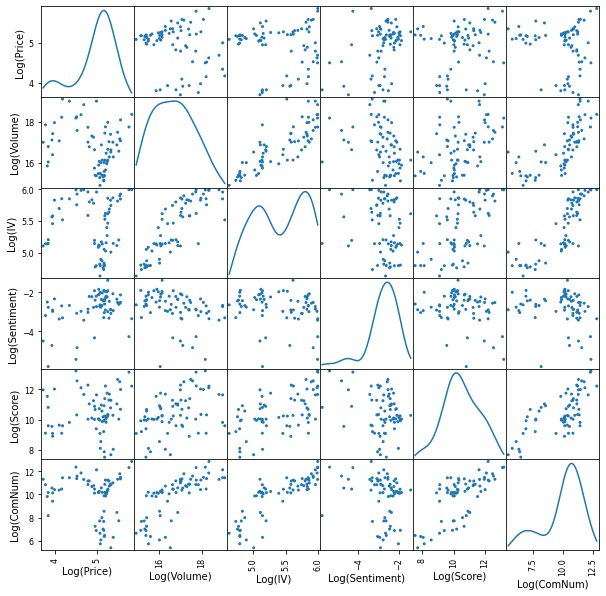

In [48]:
# scatter matrix of all variables

pd.plotting.scatter_matrix(model_data_log, diagonal = 'kde', figsize = (10, 10), alpha = 1)
plt.show()

In [20]:
# mean calculation, Shapiro-Wilk test, and Breusch-Pagan test for the model of Log(Price)

print('Mean:', sum(model_1.resid)/len(model_1.resid))
print(stats.shapiro(model_1.resid))

name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model_1.resid, model_1.model.exog)
lzip(name, test)

Mean: -9.389314722544181e-16
ShapiroResult(statistic=0.957044780254364, pvalue=0.017242588102817535)


[('Lagrange multiplier statistic', 2.854931919203981),
 ('p-value', 0.4145367934380093),
 ('f-value', 0.9354149756302245),
 ('f p-value', 0.4286548127010136)]

In [21]:
# mean calculation, Shapiro-Wilk test, and Breusch-Pagan test for the model of Log(Volume)

print('Mean:', sum(model_2.resid)/len(model_2.resid))
print(stats.shapiro(model_2.resid))

name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model_2.resid, model_2.model.exog)
lzip(name, test)

Mean: 4.1617503094520156e-15
ShapiroResult(statistic=0.9669119119644165, pvalue=0.06095468997955322)


[('Lagrange multiplier statistic', 1.558021066164007),
 ('p-value', 0.6689452638870035),
 ('f-value', 0.5008105257848229),
 ('f p-value', 0.6830209081189416)]

In [22]:
# mean calculation, Shapiro-Wilk test, and Breusch-Pagan test for the model of Log(IV) 

print('Mean:', sum(model_3.resid)/len(model_3.resid))
print(stats.shapiro(model_3.resid))

name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model_3.resid, model_3.model.exog)
lzip(name, test)

Mean: -1.2053849981644557e-15
ShapiroResult(statistic=0.9655410647392273, pvalue=0.05101529136300087)


[('Lagrange multiplier statistic', 2.9460474208335405),
 ('p-value', 0.4000186239329341),
 ('f-value', 0.966580503689429),
 ('f p-value', 0.41385764499583655)]

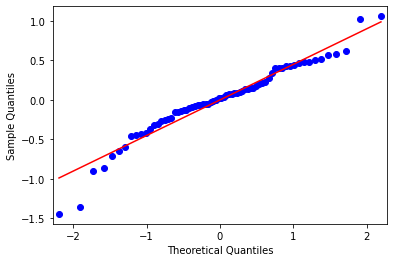

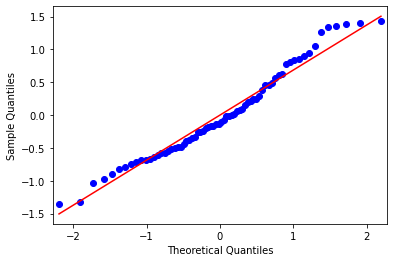

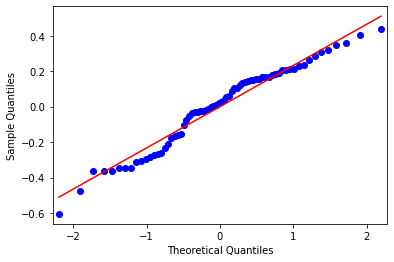

In [23]:
# q-q plots

sm.qqplot(model_1.resid, line = 's')
sm.qqplot(model_2.resid, line = 's')
sm.qqplot(model_3.resid, line = 's')
plt.show()

In [57]:
# vif calculations

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif.index = X.columns
vif

,VIF
const,69.479918
Log(Sentiment),1.077392
Log(Score),2.049512
Log(ComNum),1.980239
